# Laboratorio 2. Redes Neuronales con MNIST
- Jose Merida
- Joaquin Puente

# Preparacion de Datos
Por motivos de brevedad, vamos a colocar el procesamiento de datos dentro de una unica celda de Jupyter comentando que hace cada bloque de codigo.

In [1]:
import numpy as np
import tensorflow as tf

# Carga de datos
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()

# Confirmar forma de los conjuntos de datos
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

# Crear conjunto de validacion
num_obs_validacion = y_prueba.shape[0]
num_obs_prueba = y_prueba.shape[0]

# Normalizar datos
X_entreno_normalizado = X_entreno / 255
X_prueba_normalizado = X_prueba / 255

# Separacion entrenamiento y validacion / batches
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

# Conversion a tensores
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

# Barajeo de tandas conjunto de entrenamiento
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

# Tandas de validacion y prueba (sin barajear)
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

# Definir entrada / salida del modelo
tamanio_entrada = 784
tamanio_salida = 10

# Modelo Baseline
Empezando por el modelo delineado en el codigo visto en clase

In [ ]:
tamanio_capa_escondida = 50

# Arquitectura del modelo
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

# Optimizaror, funcion de perdida y metricas
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

# Prueba del modelo
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
500/500 - 4s - 7ms/step - accuracy: 0.8799 - loss: 0.4260 - val_accuracy: 0.9376 - val_loss: 0.2150
Epoch 2/5
500/500 - 1s - 3ms/step - accuracy: 0.9429 - loss: 0.1965 - val_accuracy: 0.9490 - val_loss: 0.1762
Epoch 3/5
500/500 - 1s - 3ms/step - accuracy: 0.9567 - loss: 0.1476 - val_accuracy: 0.9617 - val_loss: 0.1402
Epoch 4/5
500/500 - 1s - 3ms/step - accuracy: 0.9644 - loss: 0.1190 - val_accuracy: 0.9654 - val_loss: 0.1236
Epoch 5/5
500/500 - 2s - 4ms/step - accuracy: 0.9702 - loss: 0.0985 - val_accuracy: 0.9646 - val_loss: 0.1233
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 21.1766
Pérdida de prueba: 20.47. Precisión de prueba: 96.39%


El modelo baseline de por si ya tiene una precisión bastante alta, además no parece haber overfitting ya que los valores de precisión se mantienen consistentes a lo largo de los conjuntos de prueba, validación y entrenamiento.

# 1. Modificación Ancho de la Red
Para este inciso estaremos trabajando sobre el modelo Baseline proporcionado, teniendo dos capas "baseline" utilizando diferentes tamaños de capas escondidas. El objetivo es encontrar diferencias en rendimiento y tiempo de ejecución utilizando diferentes anchos de capa.

## 200 Neuronas

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 4s - 7ms/step - accuracy: 0.9169 - loss: 0.2881 - val_accuracy: 0.9637 - val_loss: 0.1237
Epoch 2/5
500/500 - 1s - 3ms/step - accuracy: 0.9669 - loss: 0.1097 - val_accuracy: 0.9670 - val_loss: 0.1029
Epoch 3/5
500/500 - 1s - 3ms/step - accuracy: 0.9785 - loss: 0.0710 - val_accuracy: 0.9744 - val_loss: 0.0844
Epoch 4/5
500/500 - 1s - 3ms/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9750 - val_loss: 0.0832
Epoch 5/5
500/500 - 3s - 5ms/step - accuracy: 0.9881 - loss: 0.0372 - val_accuracy: 0.9792 - val_loss: 0.0743
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 17.3350
Pérdida de prueba: 14.93. Precisión de prueba: 97.66%


**Configuración utilizada:**
- Capas ocultas: 2 capas de 200 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.66%
- Precisión validación: 97.92%
- Tiempo de ejecución: 11s

**Observaciones:**

Al aumentar el tamaño de las capas, el modelo logra realizar mejores predicciones. La precisión es significativamente más alta, sin embargo podemos empezar a ver una diferencia ligeramente más marcada entre el conjunto de entrenamiento y los conjuntos de prueba. Esto nos indica que con capas más anchas, el modelo es capaz de reconocer patrones más complejos presentes dentro del conjunto de datos.

## 50 Neuronas

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu')

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 3s - 6ms/step - accuracy: 0.8818 - loss: 0.4251 - val_accuracy: 0.9413 - val_loss: 0.2047
Epoch 2/5
500/500 - 2s - 3ms/step - accuracy: 0.9434 - loss: 0.1916 - val_accuracy: 0.9543 - val_loss: 0.1586
Epoch 3/5
500/500 - 1s - 3ms/step - accuracy: 0.9566 - loss: 0.1465 - val_accuracy: 0.9620 - val_loss: 0.1337
Epoch 4/5
500/500 - 2s - 5ms/step - accuracy: 0.9641 - loss: 0.1189 - val_accuracy: 0.9662 - val_loss: 0.1191
Epoch 5/5
500/500 - 1s - 3ms/step - accuracy: 0.9706 - loss: 0.0978 - val_accuracy: 0.9628 - val_loss: 0.1248
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 19.8733
Pérdida de prueba: 16.94. Precisión de prueba: 96.45%


**Configuración utilizada:**
- Capas ocultas: 2 capas de 50 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 96.62%
- Precisión validación: 96.28%
- Tiempo de ejecución: 10s

**Observaciones:**

Este modelo es idéntico al modelo baseline, tiene un rendimiento bastante aceptable y el tiempo de ejecución de la celda es corto. Podemos ver un poco de variación con la pérdida en el conjunto de evaluación, sin embargo en este caso podemos tener casi por seguro que es debido a ruido y no hay overfitting o similar.

## 100 Neuronas

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 4s - 8ms/step - accuracy: 0.9008 - loss: 0.3478 - val_accuracy: 0.9560 - val_loss: 0.1566
Epoch 2/5
500/500 - 1s - 3ms/step - accuracy: 0.9582 - loss: 0.1390 - val_accuracy: 0.9654 - val_loss: 0.1128
Epoch 3/5
500/500 - 1s - 3ms/step - accuracy: 0.9703 - loss: 0.0987 - val_accuracy: 0.9706 - val_loss: 0.1019
Epoch 4/5
500/500 - 1s - 3ms/step - accuracy: 0.9776 - loss: 0.0728 - val_accuracy: 0.9724 - val_loss: 0.0964
Epoch 5/5
500/500 - 1s - 3ms/step - accuracy: 0.9818 - loss: 0.0579 - val_accuracy: 0.9720 - val_loss: 0.0917
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 15.7796
Pérdida de prueba: 14.62. Precisión de prueba: 97.29%


**Configuración utilizada:**
- Capas ocultas: 2 capas de 100 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.29%
- Precisión validación: 97.24%
- Tiempo de ejecución: 9s

**Observaciones:**

Utilizando 100 neuronas por capa, podemos ver que los resultados son bastante similares a los de 200 neuronas. El tiempo de ejecución es ligeramente menor (9s vs 10s) y la precisión disminuye ligeramente.

## 300 Neuronas

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 4s - 8ms/step - accuracy: 0.9264 - loss: 0.2519 - val_accuracy: 0.9608 - val_loss: 0.1302
Epoch 2/5
500/500 - 2s - 3ms/step - accuracy: 0.9713 - loss: 0.0941 - val_accuracy: 0.9728 - val_loss: 0.0920
Epoch 3/5
500/500 - 1s - 3ms/step - accuracy: 0.9810 - loss: 0.0607 - val_accuracy: 0.9759 - val_loss: 0.0786
Epoch 4/5
500/500 - 3s - 5ms/step - accuracy: 0.9860 - loss: 0.0437 - val_accuracy: 0.9770 - val_loss: 0.0764
Epoch 5/5
500/500 - 1s - 3ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.9780 - val_loss: 0.0776
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 15.1816
Pérdida de prueba: 12.93. Precisión de prueba: 97.79%


**Configuración utilizada:**
- Capas ocultas: 2 capas de 300 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.79%
- Precisión validación: 97.80%
- Tiempo de ejecución: 11s

**Observaciones:**

Hasta el momento, un mayor ancho sigue dando mejores resultados. Los tiempos de entrenamiento son similares, pero a una mayor escala puede que sea algo problemático. En este caso, el descenso de gradiente parece converger bastante bien a pesar de un poco de ruido en la pérdida entre la época 4 y 5. El tiempo de ejecución es mayor a los anteriores, y aquí empezamos a ver una ligera discrepancia entre la precisión en el set de entrenamiento vs de validación. Sin embargo, hasta el momento sigue sin ser algo que realmente nos preocupe.

## 500 Neuronas

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 4s - 8ms/step - accuracy: 0.9324 - loss: 0.2277 - val_accuracy: 0.9663 - val_loss: 0.1175
Epoch 2/5
500/500 - 2s - 3ms/step - accuracy: 0.9746 - loss: 0.0830 - val_accuracy: 0.9758 - val_loss: 0.0811
Epoch 3/5
500/500 - 1s - 3ms/step - accuracy: 0.9827 - loss: 0.0542 - val_accuracy: 0.9783 - val_loss: 0.0800
Epoch 4/5
500/500 - 2s - 3ms/step - accuracy: 0.9888 - loss: 0.0361 - val_accuracy: 0.9776 - val_loss: 0.0828
Epoch 5/5
500/500 - 1s - 3ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9799 - val_loss: 0.0805
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 16.0120
Pérdida de prueba: 13.42. Precisión de prueba: 97.99%


**Configuración utilizada:**
- Capas ocultas: 2 capas de 500 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.99%
- Precisión validación: 96.39%
- Tiempo de ejecución: 11s

**Observaciones:**

Utilizando 500 neuronas parece existir un ligero sobreajuste, en este caso podemos ver cómo la precisión de entrenamiento sigue subiendo mientras que la de validación se queda estancada. Sin embargo, hasta el momento seguimos viendo ganancias al tener capas anchas.

## Conclusiones Ancho de Red
En este caso, encontramos una relación bastante clara entre ancho de red y rendimiento. Desde 50-300 neuronas, encontramos que los modelos con un mayor ancho proporcionan un mejor rendimiento a un ligero costo de tiempo de ejecución. Sin embargo, para un ancho de 500 neuronas nos dimos cuenta que existe sobreajuste y el modelo puede llegar a adaptarse demasiado a los datos de entrenamiento. En las épocas posteriores, empieza a aparecer una discrepancia entre las precisiones de entrenamiento y validación. Para la optimización final de modelos, podemos tomar lo que aprendimos y experimentar con capas de diferentes tamaños o quedarnos dentro del rango de 250-500 generalmente para evitar sobreajustes. Se puede experimentar con una capa inicial ancha, seguida de capas más angostas.

# 2. Modificación de la Profundidad de Red
Utilizando lo observado en el inciso anterior, aquí buscamos identificar cómo la profundidad de la red puede afectar el rendimiento y tiempos de ejecución. Además, podemos intentar identificar una relación en cómo la profundidad afecta la relación entre ancho y rendimiento. Por ejemplo, un ancho y una profundidad altos a la vez pueden llevar a un sobreajuste.

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 3s - 7ms/step - accuracy: 0.8794 - loss: 0.4013 - val_accuracy: 0.9407 - val_loss: 0.1982
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9459 - loss: 0.1793 - val_accuracy: 0.9585 - val_loss: 0.1438
Epoch 3/5
500/500 - 1s - 3ms/step - accuracy: 0.9590 - loss: 0.1356 - val_accuracy: 0.9642 - val_loss: 0.1258
Epoch 4/5
500/500 - 1s - 3ms/step - accuracy: 0.9675 - loss: 0.1082 - val_accuracy: 0.9667 - val_loss: 0.1122
Epoch 5/5
500/500 - 1s - 3ms/step - accuracy: 0.9724 - loss: 0.0915 - val_accuracy: 0.9652 - val_loss: 0.1173
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9597 - loss: 22.1490
Pérdida de prueba: 20.21. Precisión de prueba: 96.50%


**Configuración utilizada:**
- Capas ocultas: 3 capas de 50 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 96.50%
- Precisión validación: 96.67%
- Tiempo de ejecución: 10s

**Observaciones:**

El modelo ofrece un rendimiento bastante similar en comparación a su contraparte con anchos idénticos y una capa menos. Esto puede deberse a que una capa adicional realmente no es de mucha ayuda cuando las capas no incluyen la complejidad necesaria. En el siguiente inciso podemos examinar cómo afecta aumentar aún más la profundidad utilizando anchos de capa pequeños.

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 4s - 8ms/step - accuracy: 0.9209 - loss: 0.2685 - val_accuracy: 0.9622 - val_loss: 0.1246
Epoch 2/5
500/500 - 2s - 3ms/step - accuracy: 0.9686 - loss: 0.1017 - val_accuracy: 0.9685 - val_loss: 0.1003
Epoch 3/5
500/500 - 2s - 4ms/step - accuracy: 0.9790 - loss: 0.0667 - val_accuracy: 0.9773 - val_loss: 0.0802
Epoch 4/5
500/500 - 2s - 4ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.9753 - val_loss: 0.0909
Epoch 5/5
500/500 - 3s - 5ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9765 - val_loss: 0.0851
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 22.1030
Pérdida de prueba: 18.01. Precisión de prueba: 97.35%


**Configuración utilizada:**
- Capas ocultas: 3 capas de 250 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.35%
- Precisión validación: 97.73%
- Tiempo de ejecución: 11s

**Observaciones:**

Los resultados son bastante similares a la versión con 2 capas, puede que este set de datos no se vea beneficiado de modelos más profundos. En este caso también logramos ver señales de overfitting, dónde empieza a aparecer una diferencia entre los valores de precisión de entrenamiento y validación. Mientras los de entrenamiento siguen aimentando ligeramente, los de validación se quedan iguales o peores.

# 3. Redes Profundas
Utilizando lo que hemos observado en incisos anteriores, podemos probar una red profunda con un ancho bajo para intentar identificar mejoras, seguido de una un poco más ancha e identificar cuál tiene un mejor rendimiento. Luego, intentar agregar una capa adicional a la que mejor rendimiento tenga y comparar su rendimiento.

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 4s - 7ms/step - accuracy: 0.8712 - loss: 0.4249 - val_accuracy: 0.9363 - val_loss: 0.2197
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9483 - loss: 0.1735 - val_accuracy: 0.9623 - val_loss: 0.1330
Epoch 3/5
500/500 - 2s - 3ms/step - accuracy: 0.9619 - loss: 0.1276 - val_accuracy: 0.9638 - val_loss: 0.1318
Epoch 4/5
500/500 - 2s - 5ms/step - accuracy: 0.9682 - loss: 0.1042 - val_accuracy: 0.9640 - val_loss: 0.1252
Epoch 5/5
500/500 - 1s - 3ms/step - accuracy: 0.9743 - loss: 0.0865 - val_accuracy: 0.9698 - val_loss: 0.1084
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 23.5582
Pérdida de prueba: 19.43. Precisión de prueba: 96.40%


**Configuración utilizada:**
- Capas ocultas: 2 capas de 500 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 96.40%
- Precisión validación: 96.98%
- Tiempo de ejecución: 11s

**Observaciones:**

El rendimiento sigue siendo similar a sus contrapartes con profundidades diferentes, de momento al tener capas pequeñas no encontramos ningún beneficio al tener modelos más profundos.

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 4s - 8ms/step - accuracy: 0.9200 - loss: 0.2663 - val_accuracy: 0.9630 - val_loss: 0.1293
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9682 - loss: 0.1017 - val_accuracy: 0.9666 - val_loss: 0.1093
Epoch 3/5
500/500 - 2s - 4ms/step - accuracy: 0.9777 - loss: 0.0717 - val_accuracy: 0.9692 - val_loss: 0.1042
Epoch 4/5
500/500 - 2s - 5ms/step - accuracy: 0.9835 - loss: 0.0528 - val_accuracy: 0.9730 - val_loss: 0.0960
Epoch 5/5
500/500 - 2s - 3ms/step - accuracy: 0.9856 - loss: 0.0437 - val_accuracy: 0.9686 - val_loss: 0.1199
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 19.4594
Pérdida de prueba: 17.25. Precisión de prueba: 97.43%


**Configuración utilizada:**
- Capas ocultas: 4 capas de 250 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.43%
- Precisión validación: 96.39%
- Tiempo de ejecución: 11s

**Observaciones:**

El rendimiento fue bastante bueno, sin embargo prueba ser inferior a arquitecturas distintas. Esta arquitectura presenta un caso de overfitting bastante severo, dónde la precisión de entrenamiento aumenta de 92% hasta 98.56% mientras la de validación continúa en los mismos valores o hasta disminuye. Podemos predecir que al utilizar un modelo aún más profundo el overfitting será aún más claro.

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5
500/500 - 4s - 8ms/step - accuracy: 0.9178 - loss: 0.2689 - val_accuracy: 0.9579 - val_loss: 0.1336
Epoch 2/5
500/500 - 2s - 4ms/step - accuracy: 0.9663 - loss: 0.1098 - val_accuracy: 0.9652 - val_loss: 0.1088
Epoch 3/5
500/500 - 2s - 4ms/step - accuracy: 0.9757 - loss: 0.0779 - val_accuracy: 0.9731 - val_loss: 0.0894
Epoch 4/5
500/500 - 3s - 5ms/step - accuracy: 0.9818 - loss: 0.0597 - val_accuracy: 0.9701 - val_loss: 0.1132
Epoch 5/5
500/500 - 3s - 5ms/step - accuracy: 0.9844 - loss: 0.0500 - val_accuracy: 0.9762 - val_loss: 0.0839
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 19.6445
Pérdida de prueba: 16.92. Precisión de prueba: 97.37%


**Configuración utilizada:**
- Capas ocultas: 5 capas de 250 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.37%
- Precisión validación: 97.62%
- Tiempo de ejecución: 14s

**Observaciones:**

En este caso nos damos cuenta que nuestra predicción fue correcta, en este modelo nuevamente encontramos overfitting y dejamos de encontrar mejoras en cuanto a precisión dentro del conjunto de validación. Además, el tiempo de ejecución fue mayor en comparación a los demás.

## Conclusiones Profundidad
En cuanto a la profundidad, realmente no existieron diferencias positivas al implementar capas adicionales a los modelos. Utilizando anchos más pequeños, la precisión de los modelos fue bastante similar. Mientras que utilizando anchos más altos, los modelos tenían una tendencia más alta a sobreajustarse al conjunto de prueba. Podemos intuir que lo mejor sería seguir utilizando 2-3 capas y posiblemente jugar con los tamaños de las capas posteriores para reducir el overfitting que puede llegar a ocurrir. Esto ya que los modelos hasta el momento se han visto beneficiados de un ancho más alto, pero al aumentar más la profundidad se sobreajustan.

# 4. Funciones de Activación I
Para este inciso, estamos utilizando el modelo baseline y 10 épocas en lugar de 5. Esto con la finalidad de poder comparar las velocidades de convergencia, dándole "tiempo" a todos los modelos que puedan converger.

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='sigmoid'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 10

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/10
500/500 - 39s - 77ms/step - accuracy: 0.7679 - loss: 1.0742 - val_accuracy: 0.9033 - val_loss: 0.4260
Epoch 2/10
500/500 - 3s - 6ms/step - accuracy: 0.9076 - loss: 0.3557 - val_accuracy: 0.9283 - val_loss: 0.2683
Epoch 3/10
500/500 - 5s - 11ms/step - accuracy: 0.9275 - loss: 0.2577 - val_accuracy: 0.9401 - val_loss: 0.2147
Epoch 4/10
500/500 - 5s - 10ms/step - accuracy: 0.9395 - loss: 0.2110 - val_accuracy: 0.9495 - val_loss: 0.1847
Epoch 5/10
500/500 - 5s - 10ms/step - accuracy: 0.9479 - loss: 0.1804 - val_accuracy: 0.9539 - val_loss: 0.1680
Epoch 6/10
500/500 - 5s - 11ms/step - accuracy: 0.9546 - loss: 0.1576 - val_accuracy: 0.9566 - val_loss: 0.1536
Epoch 7/10
500/500 - 3s - 6ms/step - accuracy: 0.9591 - loss: 0.1401 - val_accuracy: 0.9605 - val_loss: 0.1429
Epoch 8/10
500/500 - 5s - 10ms/step - accuracy: 0.9637 - loss: 0.1256 - val_accuracy: 0.9609 - val_loss: 0.1339
Epoch 9/10
500/500 - 5s - 10ms/step - accuracy: 0.9674 - loss: 0.1133 - val_accuracy: 0.9621 - val_loss: 

**Configuración utilizada:**
- Capas ocultas: 2 capas de 50 neuronas con Sigmoid
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 95.45%
- Precisión validación: 96.46%
- Tiempo de ejecución: 60s

**Observaciones:**

El rendimiento entre sigmoid y ReLU para capas idénticas es bastante similar (pero ReLU es superior), sin embargo encontramos que la velocidad de convergencia es significativamente más lenta utilizando sigmoid. Adicionalmente, el tiempo de entrenamiento aumenta en comparación a ReLU. Si se tiene rendimiento y tiempo de ejecución en mente, sugerimos optar por ReLU.

# 5. Funciones de Activación II
Para este inciso seguiremos trabajando con el modelo baseline y 10 épocas

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='tanh'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 10

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/10
500/500 - 5s - 9ms/step - accuracy: 0.8819 - loss: 0.4352 - val_accuracy: 0.9451 - val_loss: 0.1986
Epoch 2/10
500/500 - 5s - 10ms/step - accuracy: 0.9481 - loss: 0.1798 - val_accuracy: 0.9566 - val_loss: 0.1559
Epoch 3/10
500/500 - 4s - 9ms/step - accuracy: 0.9599 - loss: 0.1313 - val_accuracy: 0.9649 - val_loss: 0.1244
Epoch 4/10
500/500 - 3s - 5ms/step - accuracy: 0.9690 - loss: 0.1036 - val_accuracy: 0.9671 - val_loss: 0.1141
Epoch 5/10
500/500 - 6s - 11ms/step - accuracy: 0.9745 - loss: 0.0857 - val_accuracy: 0.9711 - val_loss: 0.1005
Epoch 6/10
500/500 - 5s - 9ms/step - accuracy: 0.9785 - loss: 0.0719 - val_accuracy: 0.9708 - val_loss: 0.1051
Epoch 7/10
500/500 - 6s - 12ms/step - accuracy: 0.9820 - loss: 0.0616 - val_accuracy: 0.9714 - val_loss: 0.0991
Epoch 8/10
500/500 - 3s - 5ms/step - accuracy: 0.9845 - loss: 0.0528 - val_accuracy: 0.9716 - val_loss: 0.0965
Epoch 9/10
500/500 - 5s - 10ms/step - accuracy: 0.9860 - loss: 0.0464 - val_accuracy: 0.9731 - val_loss: 0.09

**Configuración utilizada:**
- Capas ocultas: 2 capas de 500 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 96.34%
- Precisión validación: 97.31%
- Tiempo de ejecución: 46s

**Observaciones:**

El rendimiento realmente es parecido a utilizar 2 capas ReLU, en este caso la diferencia es bastante baja y el tiempo de ejecución es alrededor de 4-5 veces más tardado en comparación. Las capas utilizando tanh tardan más en converger y tienden a variar menos, por lo que pueden llegar a ser útiles como "capa final" en algunos modelos. Sin embargo, en este caso al únicamente tener 2 capas no vemos beneficio alguno de un approach más conservador. Al utilizar ReLU, podemos captar los features de manera un poco más agresiva. De cierta manera, con las configuraciones utilizadas las ventajas y desventajas de cada uno se "cancelan" y resultan en un rendimiento similar.

# 6. Tamaño de Batch Grande

In [ ]:
TAMANIO_TANDA = 10000

datos_entreno = datos_entreno.unbatch().shuffle(buffer_size=num_obs_entreno).batch(TAMANIO_TANDA)
datos_validacion = datos_validacion.unbatch().batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.unbatch().batch(TAMANIO_TANDA)


In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 - 3s - 687ms/step - accuracy: 0.2447 - loss: 2.2125 - val_accuracy: 0.3867 - val_loss: 2.0438
Epoch 2/5
5/5 - 1s - 163ms/step - accuracy: 0.4508 - loss: 1.9371 - val_accuracy: 0.5611 - val_loss: 1.7490
Epoch 3/5
5/5 - 3s - 508ms/step - accuracy: 0.5838 - loss: 1.6270 - val_accuracy: 0.6473 - val_loss: 1.4169
Epoch 4/5
5/5 - 1s - 251ms/step - accuracy: 0.6566 - loss: 1.3111 - val_accuracy: 0.7070 - val_loss: 1.1174
Epoch 5/5
5/5 - 1s - 254ms/step - accuracy: 0.7219 - loss: 1.0451 - val_accuracy: 0.7854 - val_loss: 0.8790
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.7818 - loss: 39.6636
Pérdida de prueba: 39.66. Precisión de prueba: 78.18%


**Configuración utilizada:**
- Capas ocultas: 2 capas de 500 neuronas con ReLU
- Batch size: 10,000
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 78.18%
- Precisión validación: 78.54%
- Tiempo de ejecución: 9s

**Observaciones:**

Utilizar un batch size excesivamente grande, cómo lo es este ejemplo, puede resultar en un modelo demasiado "tonto". Dónde el modelo puede ser entrenado rápidamente pero generaliza demasiado y no es capaz de converger a los mínimos que debería.

# 7. Descenso de Gradiente Estocástico

In [8]:
TAMANIO_TANDA = 1
tamanio_capa_escondida = 50
datos_entreno = datos_entreno.unbatch().shuffle(buffer_size=num_obs_entreno).batch(TAMANIO_TANDA)
datos_validacion = datos_validacion.unbatch().batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.unbatch().batch(TAMANIO_TANDA)

In [9]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50000/50000 - 141s - 3ms/step - accuracy: 0.9233 - loss: 0.2576 - val_accuracy: 0.9558 - val_loss: 0.1442
Epoch 2/5
50000/50000 - 129s - 3ms/step - accuracy: 0.9566 - loss: 0.1570 - val_accuracy: 0.9573 - val_loss: 0.1665
Epoch 3/5
50000/50000 - 120s - 2ms/step - accuracy: 0.9629 - loss: 0.1374 - val_accuracy: 0.9576 - val_loss: 0.1669
Epoch 4/5
50000/50000 - 119s - 2ms/step - accuracy: 0.9669 - loss: 0.1247 - val_accuracy: 0.9642 - val_loss: 0.1597
Epoch 5/5
50000/50000 - 149s - 3ms/step - accuracy: 0.9691 - loss: 0.1206 - val_accuracy: 0.9666 - val_loss: 0.1556
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9564 - loss: 46.6860
Pérdida de prueba: 40.50. Precisión de prueba: 96.26%


**Configuración utilizada:**
- Capas ocultas: 2 capas de 500 neuronas con ReLU
- Batch size: 1
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 96.26%
- Precisión validación: 96.66%
- Tiempo de ejecución: 11mins

**Observaciones:**

Al utilizar un batch size de 1, el tiempo de ejecución es sumamente alto y es sumamente lento para converger. En este caso, nos vimos limitados con el número de épocas para entrenar el modelo debido a los tiempos excesivos de ejecución. En teoría, este tipo de modelos son sumamente efectivos al poder evitar mínimos locales. Sin embargo, en práctica, su implementación resulta en tiempos de ejecución excesivamente altos y una convergencia demasiado lenta.

# 8. Tasa de Aprendizaje Baja

In [ ]:
TAMANIO_TANDA = 100

datos_entreno = datos_entreno.unbatch().shuffle(buffer_size=num_obs_entreno).batch(TAMANIO_TANDA)
datos_validacion = datos_validacion.unbatch().batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.unbatch().batch(TAMANIO_TANDA)

modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

optimizador = tf.keras.optimizers.Adam(learning_rate=0.0001)

modelo.compile(optimizer=optimizador, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 10

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/10
500/500 - 4s - 9ms/step - accuracy: 0.6307 - loss: 1.3269 - val_accuracy: 0.8621 - val_loss: 0.5945
Epoch 2/10
500/500 - 3s - 7ms/step - accuracy: 0.8709 - loss: 0.4936 - val_accuracy: 0.9028 - val_loss: 0.3673
Epoch 3/10
500/500 - 4s - 9ms/step - accuracy: 0.9007 - loss: 0.3601 - val_accuracy: 0.9177 - val_loss: 0.3017
Epoch 4/10
500/500 - 5s - 10ms/step - accuracy: 0.9144 - loss: 0.3068 - val_accuracy: 0.9259 - val_loss: 0.2675
Epoch 5/10
500/500 - 3s - 6ms/step - accuracy: 0.9221 - loss: 0.2752 - val_accuracy: 0.9309 - val_loss: 0.2477
Epoch 6/10
500/500 - 5s - 10ms/step - accuracy: 0.9285 - loss: 0.2527 - val_accuracy: 0.9361 - val_loss: 0.2295
Epoch 7/10
500/500 - 2s - 5ms/step - accuracy: 0.9328 - loss: 0.2352 - val_accuracy: 0.9402 - val_loss: 0.2173
Epoch 8/10
500/500 - 5s - 10ms/step - accuracy: 0.9370 - loss: 0.2207 - val_accuracy: 0.9423 - val_loss: 0.2060
Epoch 9/10
500/500 - 8s - 15ms/step - accuracy: 0.9401 - loss: 0.2081 - val_accuracy: 0.9470 - val_loss: 0.19

**Configuración utilizada:**
- Capas ocultas: 2 capas de 50 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 94.06%
- Precisión validación: 94.76%
- Tiempo de ejecución: 14s

**Observaciones:**

En este caso, la velocidad de convergencia del modelo fue bastante lenta. A pesar de haber agregado épocas adicionales, parece no terminar de converger. Adicionalmente, este tipo de modelos con tasas de aprendizajes bajas suele quedarse "atascado" en mínimos locales.

# 9. Tasa de Aprendizaje Alta

In [ ]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'),

    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])

optimizador = tf.keras.optimizers.Adam(learning_rate=0.02)

modelo.compile(optimizer=optimizador, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NUMERO_EPOCAS = 10

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS,
          validation_data = datos_validacion,
          verbose = 2)

perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Epoch 1/10
500/500 - 5s - 10ms/step - accuracy: 0.8998 - loss: 0.3318 - val_accuracy: 0.9392 - val_loss: 0.2128
Epoch 2/10
500/500 - 2s - 5ms/step - accuracy: 0.9420 - loss: 0.2017 - val_accuracy: 0.9448 - val_loss: 0.2072
Epoch 3/10
500/500 - 4s - 7ms/step - accuracy: 0.9480 - loss: 0.1845 - val_accuracy: 0.9483 - val_loss: 0.1977
Epoch 4/10
500/500 - 4s - 9ms/step - accuracy: 0.9536 - loss: 0.1710 - val_accuracy: 0.9527 - val_loss: 0.1883
Epoch 5/10
500/500 - 5s - 11ms/step - accuracy: 0.9543 - loss: 0.1666 - val_accuracy: 0.9506 - val_loss: 0.1977
Epoch 6/10
500/500 - 3s - 5ms/step - accuracy: 0.9566 - loss: 0.1597 - val_accuracy: 0.9519 - val_loss: 0.1954
Epoch 7/10
500/500 - 3s - 5ms/step - accuracy: 0.9578 - loss: 0.1589 - val_accuracy: 0.9562 - val_loss: 0.2020
Epoch 8/10
500/500 - 2s - 5ms/step - accuracy: 0.9601 - loss: 0.1519 - val_accuracy: 0.9494 - val_loss: 0.2311
Epoch 9/10
500/500 - 3s - 6ms/step - accuracy: 0.9615 - loss: 0.1486 - val_accuracy: 0.9518 - val_loss: 0.2136

**Configuración utilizada:**
- Capas ocultas: 2 capas de 500 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión entrenamiento: 95.25%
- Precisión validación: 95.92%
- Tiempo de ejecución: 13s

**Observaciones:**

Utilizando learning rates más altos, se evita completamente quedar atascados en mínimos locales. El modelo puede moverse más "bruscamente" buscando soluciones más óptimas, sin embargo parece nunca poder "decidirse" para converger en el lugar correcto. En este caso vemos como la pérdida sigue variando y no encuentra un único lugar dónde enfocarse realmente.

# 10. Optimización Avanzada
Para aplicar L2 y Dropout, podemos empezar por un modelo bastante "seguro". Por "seguro" nos referimos a un modelo que no ha exhibido patrones de overfitting, pero tiene la complejidad suficiente donde una "ayuda a generalizar" puede probar su utilidad.

## Regularizacion Moderada

In [ ]:
from tensorflow.keras import regularizers

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])
modelo.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

modelo.fit(datos_entreno,
                   epochs=10,
                   validation_data=datos_validacion,
                   verbose=2)

perdida, precision = modelo.evaluate(datos_prueba)
print(f'Precisión prueba: {precision*100:.2f}% | Pérdida: {perdida:.4f}\n')

Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)
Epoch 1/10
500/500 - 8s - 15ms/step - accuracy: 0.9080 - loss: 0.6001 - val_accuracy: 0.9630 - val_loss: 0.3669
Epoch 2/10
500/500 - 7s - 15ms/step - accuracy: 0.9599 - loss: 0.3376 - val_accuracy: 0.9696 - val_loss: 0.2816
Epoch 3/10
500/500 - 5s - 10ms/step - accuracy: 0.9687 - loss: 0.2608 - val_accuracy: 0.9663 - val_loss: 0.2560
Epoch 4/10
500/500 - 5s - 10ms/step - accuracy: 0.9710 - loss: 0.2242 - val_accuracy: 0.9752 - val_loss: 0.2052
Epoch 5/10
500/500 - 3s - 6ms/step - accuracy: 0.9746 - loss: 0.1987 - val_accuracy: 0.9750 - val_loss: 0.1955
Epoch 6/10
500/500 - 5s - 11ms/step - accuracy: 0.9750 - loss: 0.1881 - val_accuracy: 0.9749 - val_loss: 0.1910
Epoch 7/10
500/500 - 5s - 10ms/step - accuracy: 0.9771 - loss: 0.1779 - val_accuracy: 0.9721 - val_loss: 0.1936
Epoch 8/10
500/500 - 5s - 10ms/step - accuracy: 0.9783 - loss: 0.1717 - val_accuracy: 0.9769 - val_loss: 0.1731
Epoch 9/10
500/500 - 8s - 16ms/step - a

**Configuración utilizada:**
- Capas ocultas: 3 capas de 256 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.72%
- Precisión validación: 96.34%
- Tiempo de ejecución: 18s

**Observaciones:**

Comparando este modelo con un modelo similar sin Dropout ni L2, el rendimiento fue ligeramente peor. Sin embargo, logramos ver que parece existir menos ajuste en cuánto a los datos de entrenamiento. Por ejemplo, en el otro modelo encontramos precisión cercana al 99% en el set de entrenamiento mientras aquí quedó en 98% con resultados similares. Esto nos indica que este modelo si logra prevenir de cierta manera el overfitting, por lo cual se pueden tomar en cuenta estas técnicas para arquitecturas más complejas.

## Regularización Alta con Dropout

In [ ]:
from tensorflow.keras import regularizers

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])
modelo.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

modelo.fit(datos_entreno,
                   epochs=10,
                   validation_data=datos_validacion,
                   verbose=2)

perdida, precision = modelo.evaluate(datos_prueba)
print(f'Precisión prueba: {precision*100:.2f}% | Pérdida: {perdida:.4f}\n')

Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)
Epoch 1/10
500/500 - 6s - 13ms/step - accuracy: 0.8701 - loss: 1.6939 - val_accuracy: 0.9206 - val_loss: 0.6515
Epoch 2/10
500/500 - 5s - 10ms/step - accuracy: 0.9138 - loss: 0.6468 - val_accuracy: 0.9394 - val_loss: 0.5475
Epoch 3/10
500/500 - 3s - 6ms/step - accuracy: 0.9244 - loss: 0.5800 - val_accuracy: 0.9448 - val_loss: 0.5050
Epoch 4/10
500/500 - 10s - 20ms/step - accuracy: 0.9291 - loss: 0.5408 - val_accuracy: 0.9460 - val_loss: 0.4791
Epoch 5/10
500/500 - 3s - 6ms/step - accuracy: 0.9320 - loss: 0.5143 - val_accuracy: 0.9456 - val_loss: 0.4675
Epoch 6/10
500/500 - 3s - 6ms/step - accuracy: 0.9340 - loss: 0.4956 - val_accuracy: 0.9444 - val_loss: 0.4619
Epoch 7/10
500/500 - 5s - 10ms/step - accuracy: 0.9380 - loss: 0.4742 - val_accuracy: 0.9582 - val_loss: 0.4091
Epoch 8/10
500/500 - 3s - 6ms/step - accuracy: 0.9385 - loss: 0.4633 - val_accuracy: 0.9502 - val_loss: 0.4288
Epoch 9/10
500/500 - 3s - 5ms/step - accu

**Configuración utilizada:**
- Capas ocultas: 3 capas de 256 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 92.46%
- Precisión validación: 95.82%
- Tiempo de ejecución: 18s

**Observaciones:**

El modelo parece tomar un approach demasiado "generalizador" con los parámetros utilizados, logra converger a una precisión específica bastante bien y el descenso de gradiente se ve bien también. Sin embargo, parece no ser capaz de llegar a una precisión alta. Esto nos indica que deberíamos probar parámetros un poco más bajos al utilizar L2 y dropouts, y además podríamos probar utilizar parámetros altos en las primeras capas y disminuirlos en las siguientes.

## Únicamente Dropout

In [ ]:
from tensorflow.keras import regularizers

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])
modelo.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

modelo.fit(datos_entreno,
                   epochs=10,
                   validation_data=datos_validacion,
                   verbose=2)

perdida, precision = modelo.evaluate(datos_prueba)
print(f'Precisión prueba: {precision*100:.2f}% | Pérdida: {perdida:.4f}\n')

Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)
Epoch 1/10
500/500 - 6s - 12ms/step - accuracy: 0.8975 - loss: 0.3370 - val_accuracy: 0.9615 - val_loss: 0.1248
Epoch 2/10
500/500 - 5s - 10ms/step - accuracy: 0.9579 - loss: 0.1412 - val_accuracy: 0.9704 - val_loss: 0.1013
Epoch 3/10
500/500 - 3s - 6ms/step - accuracy: 0.9681 - loss: 0.1037 - val_accuracy: 0.9759 - val_loss: 0.0811
Epoch 4/10
500/500 - 5s - 10ms/step - accuracy: 0.9735 - loss: 0.0850 - val_accuracy: 0.9769 - val_loss: 0.0802
Epoch 5/10
500/500 - 5s - 10ms/step - accuracy: 0.9775 - loss: 0.0711 - val_accuracy: 0.9793 - val_loss: 0.0716
Epoch 6/10
500/500 - 3s - 5ms/step - accuracy: 0.9791 - loss: 0.0646 - val_accuracy: 0.9786 - val_loss: 0.0748
Epoch 7/10
500/500 - 5s - 10ms/step - accuracy: 0.9828 - loss: 0.0553 - val_accuracy: 0.9771 - val_loss: 0.0806
Epoch 8/10
500/500 - 3s - 7ms/step - accuracy: 0.9841 - loss: 0.0511 - val_accuracy: 0.9778 - val_loss: 0.0803
Epoch 9/10
500/500 - 3s - 5ms/step - accu

**Configuración utilizada:**
- Capas ocultas: 3 capas de 256 neuronas con ReLU
- Batch size: 100
- Learning rate: 0.001 (Default)

**Resultados:**
- Precisión prueba: 97.54%
- Precisión validación: 95.82%
- Tiempo de ejecución: 18s

**Observaciones:**

En este caso, la implementación de dropout fue bastante exitosa. La precisión en el conjunto de prueba fue de 97.54%, sin embargo seguimos viendo una ligera tendencia al overfitting. Dónde en el conjunto de prueba observamos precisiones más altas en comparación al conjunto de validación. En búsqueda de un mejor modelo, podemos intentar implementar esta técnica en las primeras capas en conjunción con L2 e intentar que las últimas capas tengan una mayor libertad.

# 11. Visualización
Aquí examinamos Ancho de Capa vs Precisión, pérdida y precisión a lo largo del entrenamiento, y en el último inciso incluimos una visualización del modelo más preciso sobre los features que reconoce.

## Ancho de Capa vs Precisión

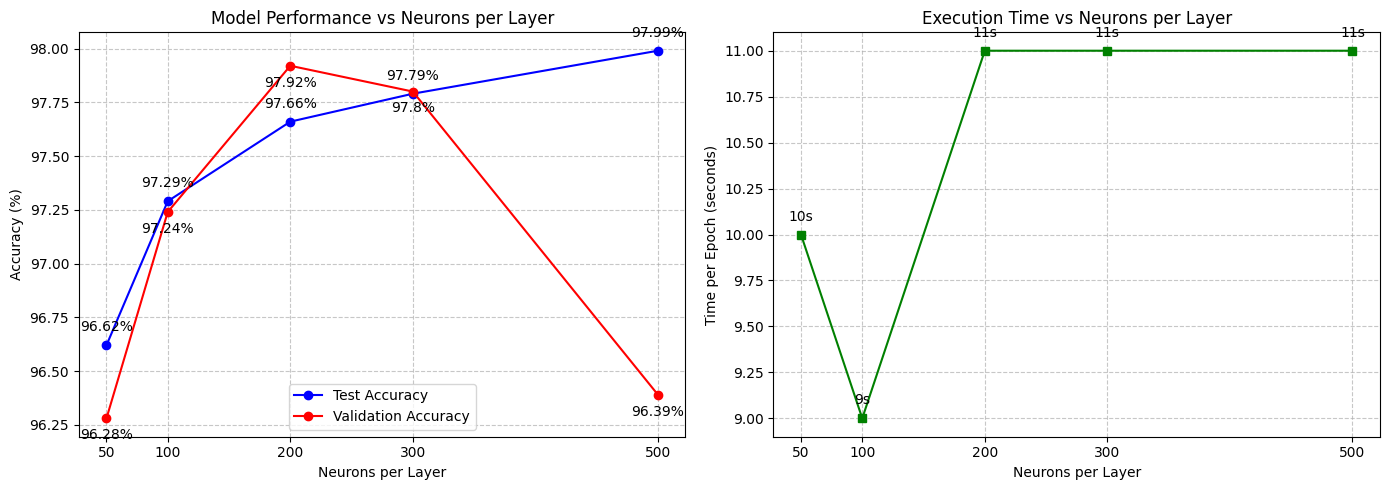

In [4]:
import matplotlib.pyplot as plt
import numpy as np

neurons_per_layer = [500, 300, 200, 100, 50]
test_accuracies = [97.99, 97.79, 97.66, 97.29, 96.62]
val_accuracies = [96.39, 97.80, 97.92, 97.24, 96.28]
execution_times = [11, 11, 11, 9, 10]  # in seconds

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(neurons_per_layer, test_accuracies, 'bo-', label='Test Accuracy')
ax1.plot(neurons_per_layer, val_accuracies, 'ro-', label='Validation Accuracy')
ax1.set_title('Model Performance vs Neurons per Layer')
ax1.set_xlabel('Neurons per Layer')
ax1.set_ylabel('Accuracy (%)')
ax1.set_xticks(neurons_per_layer)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

for i, (n, ta, va) in enumerate(zip(neurons_per_layer, test_accuracies, val_accuracies)):
    ax1.annotate(f'{ta}%', (n, ta), textcoords="offset points", xytext=(0,10), ha='center')
    ax1.annotate(f'{va}%', (n, va), textcoords="offset points", xytext=(0,-15), ha='center')

ax2.plot(neurons_per_layer, execution_times, 'gs-')
ax2.set_title('Execution Time vs Neurons per Layer')
ax2.set_xlabel('Neurons per Layer')
ax2.set_ylabel('Time per Epoch (seconds)')
ax2.set_xticks(neurons_per_layer)
ax2.grid(True, linestyle='--', alpha=0.7)

for i, (n, t) in enumerate(zip(neurons_per_layer, execution_times)):
    ax2.annotate(f'{t}s', (n, t), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

En la gráfica podemos observar que un simple cambio en cuanto al ancho de la red neuronal puede dar resultados superiores sin aumentar el tiempo de ejecución significativamente. Es sumamente importante lograr elegir un ancho que logre captar las relaciones de la información correctamente para poder realizar predicciones precisas, ya que un modelo angosto puede quedarse corto.

## Precisión y Pérdida Conforme el Entrenamiento

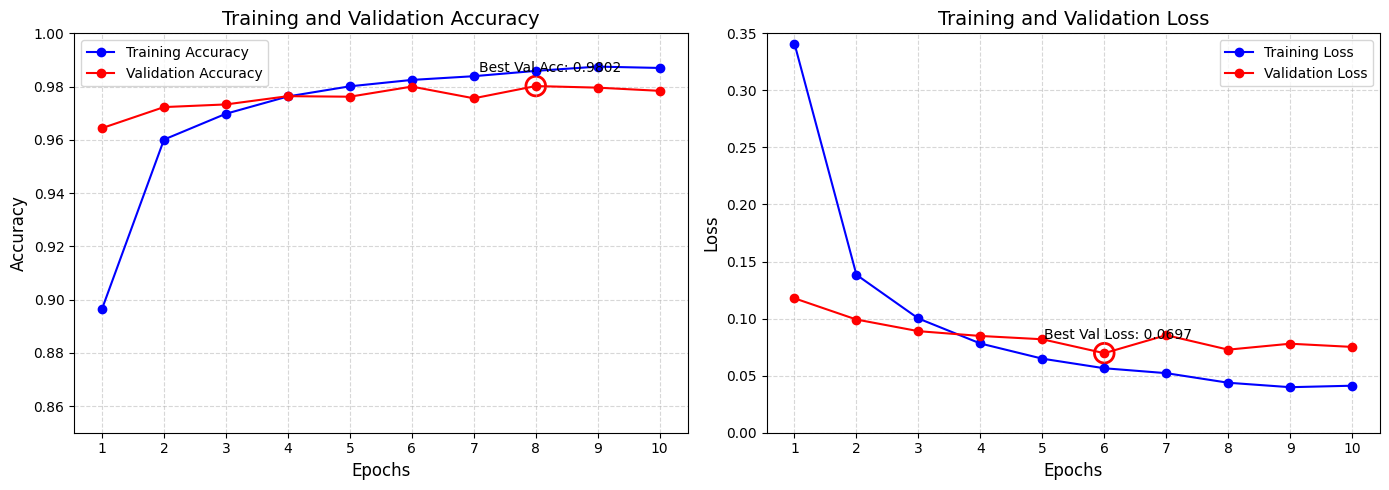

In [5]:
import matplotlib.pyplot as plt
import numpy as np

epochs = range(1, 11)
train_acc = [0.8965, 0.9601, 0.9698, 0.9763, 0.9801, 0.9825, 0.9839, 0.9859, 0.9875, 0.9870]
train_loss = [0.3410, 0.1384, 0.1001, 0.0782, 0.0649, 0.0565, 0.0522, 0.0438, 0.0399, 0.0412]
val_acc = [0.9644, 0.9723, 0.9733, 0.9764, 0.9762, 0.9800, 0.9756, 0.9802, 0.9796, 0.9784]
val_loss = [0.1178, 0.0992, 0.0890, 0.0848, 0.0819, 0.0697, 0.0855, 0.0728, 0.0780, 0.0752]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs)
plt.ylim(0.85, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

best_val_acc = max(val_acc)
best_epoch = val_acc.index(best_val_acc) + 1
plt.scatter(best_epoch, best_val_acc, s=200, facecolors='none', edgecolors='r', linewidths=2)
plt.annotate(f'Best Val Acc: {best_val_acc:.4f}',
             (best_epoch, best_val_acc),
             textcoords="offset points",
             xytext=(10,10),
             ha='center',
             fontsize=10)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(epochs)
plt.ylim(0.0, 0.35)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

best_val_loss = min(val_loss)
best_epoch_loss = val_loss.index(best_val_loss) + 1
plt.scatter(best_epoch_loss, best_val_loss, s=200, facecolors='none', edgecolors='r', linewidths=2)
plt.annotate(f'Best Val Loss: {best_val_loss:.4f}',
             (best_epoch_loss, best_val_loss),
             textcoords="offset points",
             xytext=(10,10),
             ha='center',
             fontsize=10)

plt.tight_layout()
plt.show()


En la gráfica podemos observvar como los valores convergen de cierta manera, dónde va disminuyendo la tasa de cambio conforme aumentan las épocas. Además, las precisiones de validación y de prueba ambas van llegando a un punto bastante cercano. En casos donde existe sobreajuste, la línea azúl en la gráfica de la izquierda seguiría aumentando y la roja se quedaría estancada antes.

# 12. Modelo Óptimo

Con base en los resultados obtenidos en los experimentos anteriores, planteamos un modelo que cumpla con las siguientes características:

- Una capa inicial ancha, seguida de capas más angostas
- ReLU para todas las capas, potencialmente tanh para la última
- Learning Rate cercano al default, para evitar convergencia muy temprana o tardía.
- Implementación de dropout y L2 para evitar overfitting


In [ ]:
from tensorflow.keras import regularizers

# Modelo con regularización moderada
# 1. Light Regularization Model (L2 + Dropout)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])
modelo.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

print("Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)")
modelo.fit(datos_entreno,
                   epochs=10,
                   validation_data=datos_validacion,
                   verbose=2)

perdida, precision = modelo.evaluate(datos_prueba)
print(f'Precisión prueba: {precision*100:.2f}% | Pérdida: {perdida:.4f}\n')

Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)
Epoch 1/10
500/500 - 7s - 14ms/step - accuracy: 0.8965 - loss: 0.3410 - val_accuracy: 0.9644 - val_loss: 0.1178
Epoch 2/10
500/500 - 8s - 15ms/step - accuracy: 0.9601 - loss: 0.1384 - val_accuracy: 0.9723 - val_loss: 0.0992
Epoch 3/10
500/500 - 3s - 6ms/step - accuracy: 0.9698 - loss: 0.1001 - val_accuracy: 0.9733 - val_loss: 0.0890
Epoch 4/10
500/500 - 5s - 10ms/step - accuracy: 0.9763 - loss: 0.0782 - val_accuracy: 0.9764 - val_loss: 0.0848
Epoch 5/10
500/500 - 3s - 6ms/step - accuracy: 0.9801 - loss: 0.0649 - val_accuracy: 0.9762 - val_loss: 0.0819
Epoch 6/10
500/500 - 3s - 5ms/step - accuracy: 0.9825 - loss: 0.0565 - val_accuracy: 0.9800 - val_loss: 0.0697
Epoch 7/10
500/500 - 3s - 6ms/step - accuracy: 0.9839 - loss: 0.0522 - val_accuracy: 0.9756 - val_loss: 0.0855
Epoch 8/10
500/500 - 5s - 10ms/step - accuracy: 0.9859 - loss: 0.0438 - val_accuracy: 0.9802 - val_loss: 0.0728
Epoch 9/10
500/500 - 3s - 5ms/step - accur

Este modelo inicial únicamente empleo dropout, y 3 capas con la siguiente configuración:

- 512 neuronas ReLU
- 128 neuronas ReLU
- 128 neuronas ReLU

Tuvo un rendimiento bastante bueno, sin embargo queremos seguir mejorándolo. Lo que podemos observar aquí es lo siguiente:

- Ligero overfitting, dónde hay una pequeña discrepancia entre la precisión de entrenamiento y validación. Alrededor del 1%
- El modelo parece seguir mejorando, puede que más épocas pruebe ser beneficioso

Podemos plantear los siguientes cambios:

- Implementar la última capa utilizando tanh
- Aumentar la cantidad de épocas
- Aplicar L2 a la primera capa
- Variar el dropout para disminuir en las capas posteriores

In [6]:
from tensorflow.keras import regularizers

# Modelo con regularización moderada
# 1. Light Regularization Model (L2 + Dropout)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])
modelo.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

print("Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)")
modelo.fit(datos_entreno,
                   epochs=20,
                   validation_data=datos_validacion,
                   verbose=2)

perdida, precision = modelo.evaluate(datos_prueba)
print(f'Precisión prueba: {precision*100:.2f}% | Pérdida: {perdida:.4f}\n')

Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)
Epoch 1/20
500/500 - 5s - 10ms/step - accuracy: 0.8887 - loss: 0.9908 - val_accuracy: 0.9510 - val_loss: 0.3663
Epoch 2/20
500/500 - 2s - 3ms/step - accuracy: 0.9267 - loss: 0.4327 - val_accuracy: 0.9590 - val_loss: 0.3311
Epoch 3/20
500/500 - 2s - 3ms/step - accuracy: 0.9346 - loss: 0.3990 - val_accuracy: 0.9621 - val_loss: 0.2976
Epoch 4/20
500/500 - 3s - 5ms/step - accuracy: 0.9372 - loss: 0.3790 - val_accuracy: 0.9585 - val_loss: 0.3070
Epoch 5/20
500/500 - 2s - 3ms/step - accuracy: 0.9400 - loss: 0.3663 - val_accuracy: 0.9571 - val_loss: 0.3002
Epoch 6/20
500/500 - 1s - 3ms/step - accuracy: 0.9403 - loss: 0.3557 - val_accuracy: 0.9653 - val_loss: 0.2799
Epoch 7/20
500/500 - 2s - 3ms/step - accuracy: 0.9416 - loss: 0.3534 - val_accuracy: 0.9648 - val_loss: 0.2845
Epoch 8/20
500/500 - 2s - 3ms/step - accuracy: 0.9433 - loss: 0.3409 - val_accuracy: 0.9679 - val_loss: 0.2644
Epoch 9/20
500/500 - 2s - 5ms/step - accuracy

Luego de aplicar L2 a la primera capa, observamos que la velocidad de convergencia es bastante lenta. Podemos intuir que únicamente dropout puede ser adecuado para la primera capa, además, podemos intentar variar ligeramente la arquitectura del modelo nuevamente para explorar más soluciones.

In [5]:
from tensorflow.keras import regularizers

# Modelo con regularización moderada
# 1. Light Regularization Model (L2 + Dropout)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(tamanio_salida, activation='softmax')
])
modelo.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

print("Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)")
modelo.fit(datos_entreno,
                   epochs=20,
                   validation_data=datos_validacion,
                   verbose=2)

perdida, precision = modelo.evaluate(datos_prueba)
print(f'Precisión prueba: {precision*100:.2f}% | Pérdida: {perdida:.4f}\n')

Entrenamiento con regularización moderada (L2=0.001, Dropout=0.2)
Epoch 1/20
500/500 - 6s - 12ms/step - accuracy: 0.9103 - loss: 0.2931 - val_accuracy: 0.9661 - val_loss: 0.1117
Epoch 2/20
500/500 - 2s - 4ms/step - accuracy: 0.9595 - loss: 0.1320 - val_accuracy: 0.9742 - val_loss: 0.0887
Epoch 3/20
500/500 - 3s - 5ms/step - accuracy: 0.9704 - loss: 0.0946 - val_accuracy: 0.9731 - val_loss: 0.0931
Epoch 4/20
500/500 - 1s - 3ms/step - accuracy: 0.9755 - loss: 0.0783 - val_accuracy: 0.9750 - val_loss: 0.0869
Epoch 5/20
500/500 - 2s - 3ms/step - accuracy: 0.9795 - loss: 0.0666 - val_accuracy: 0.9790 - val_loss: 0.0741
Epoch 6/20
500/500 - 2s - 4ms/step - accuracy: 0.9810 - loss: 0.0602 - val_accuracy: 0.9775 - val_loss: 0.0805
Epoch 7/20
500/500 - 2s - 4ms/step - accuracy: 0.9829 - loss: 0.0527 - val_accuracy: 0.9759 - val_loss: 0.0919
Epoch 8/20
500/500 - 2s - 4ms/step - accuracy: 0.9840 - loss: 0.0483 - val_accuracy: 0.9767 - val_loss: 0.0865
Epoch 9/20
500/500 - 2s - 3ms/step - accuracy

Con una precisión de prueba del 98.18, obtenemos nuestro mejor modelo. En este caso, existe un ligero overfit al seguir aumentando la precisión de entrenamiento sin aumentar la precisión de validación. Una posible solución podría ser implementar valores pequeños de L2 en la primera capa, aumentando a su vez la cantidad de épocas para lograr converger a pesar de la velocidad más lenta inducida por L2. Sin embargo, a pesar del overfit este modelo cumple con las expectativas al iniciar este Notebook.

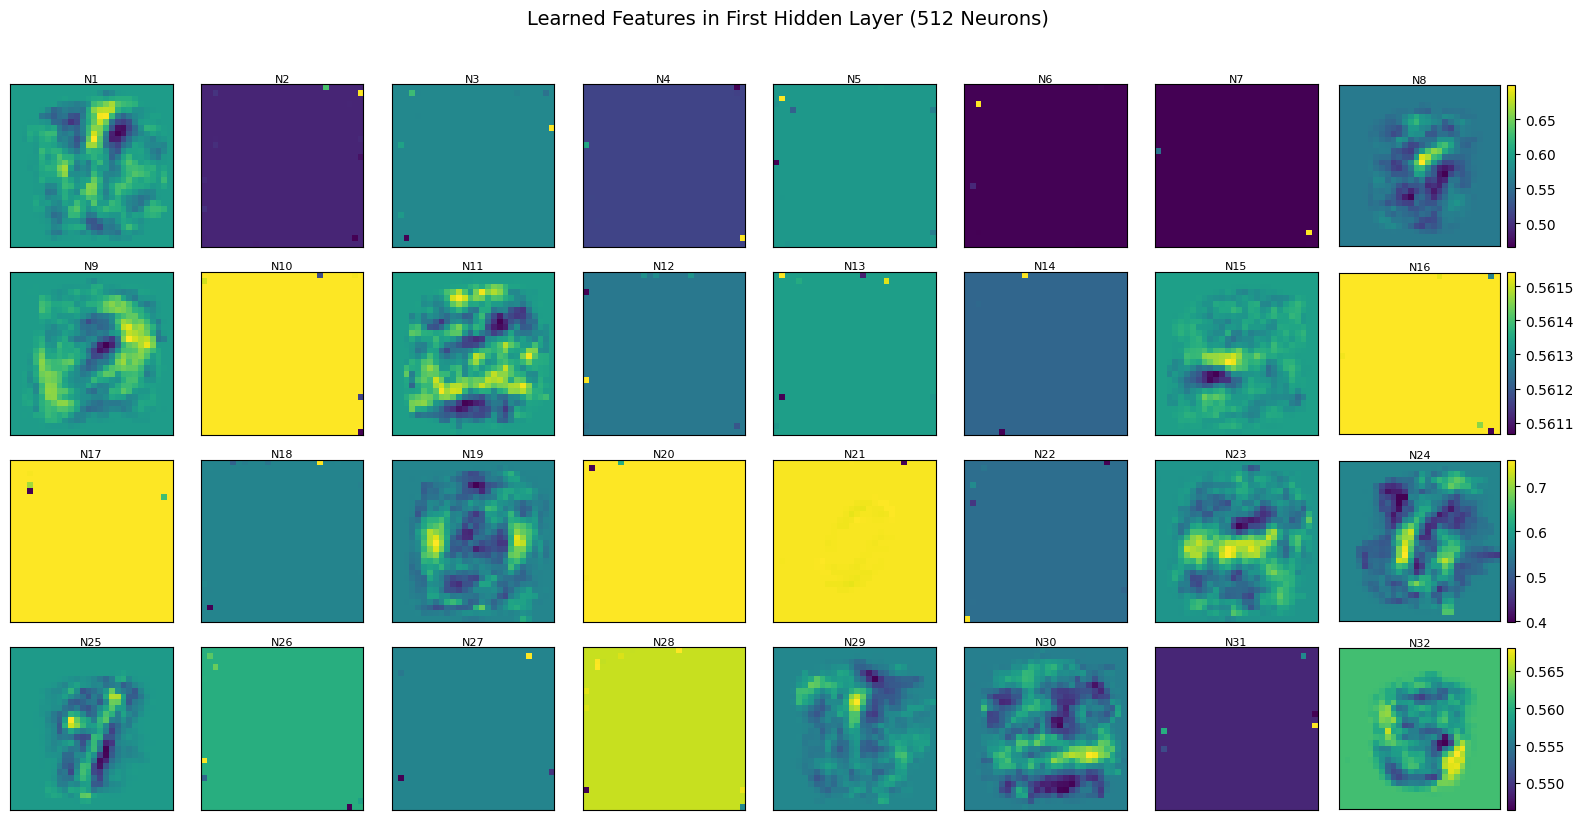

In [7]:
import matplotlib.pyplot as plt
import numpy as np


weights = modelo.layers[1].get_weights()[0]

weights = (weights - weights.min()) / (weights.max() - weights.min())

plt.figure(figsize=(16, 8))
plt.suptitle('Learned Features in First Hidden Layer (512 Neurons)', y=1.02, fontsize=14)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(32):
    plt.subplot(4, 8, i+1)
    neuron_weights = weights[:, i].reshape(28, 28)

    plt.imshow(neuron_weights, cmap='viridis', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'N{i+1}', fontsize=8, pad=2)

    if i % 8 == 7:
        plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

En el caso de los features, logramos ver como desde el inic io se logran formar tendencias sobre las formas de los números. En este caso, podemos ver patrones que se asimilan a los números "1", "2", "5", "6" a lo lejos dentro de únicamente la primera capa. Esto nos ayuda un poco a explicar y respaldar la decisión de implementar una primera capa ancha, ya que estas relaciones pueden ser difíciles de captar en capas más angostas. En este caso, forman una buena "base" para que las demás capas hagan la diferenciación de features más pequeños o menos marcados.